# Beijing Air Quality Forecasting Starter Notebook

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Google Drive to access datasets
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [22]:
# Load the datasets
# Ensure train.csv and test.csv are saved in your Google Drive in the same folder.
# Replace the file paths below with the actual paths to your dataset.
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')


# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.

In [23]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")
train.head()

Training Data Overview:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [24]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [25]:
# Ensure 'datetime' column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])




In [26]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

## Time-Series Plot of PM2.5

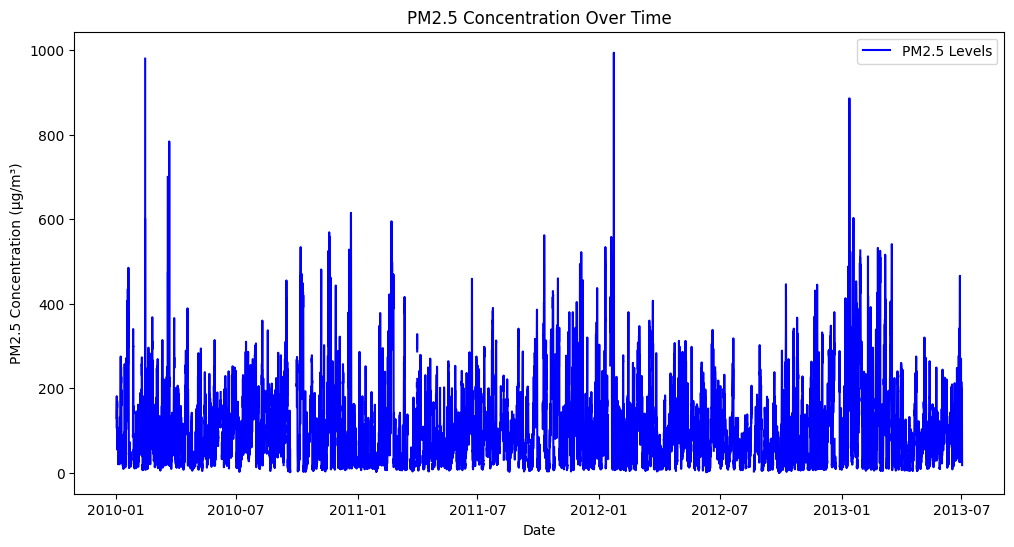

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(train['datetime'], train['pm2.5'], color='blue', label='PM2.5 Levels')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('PM2.5 Concentration Over Time')
plt.legend()
plt.show()


✅ Purpose: See PM2.5 trends over time.

## Correlation Heatmap

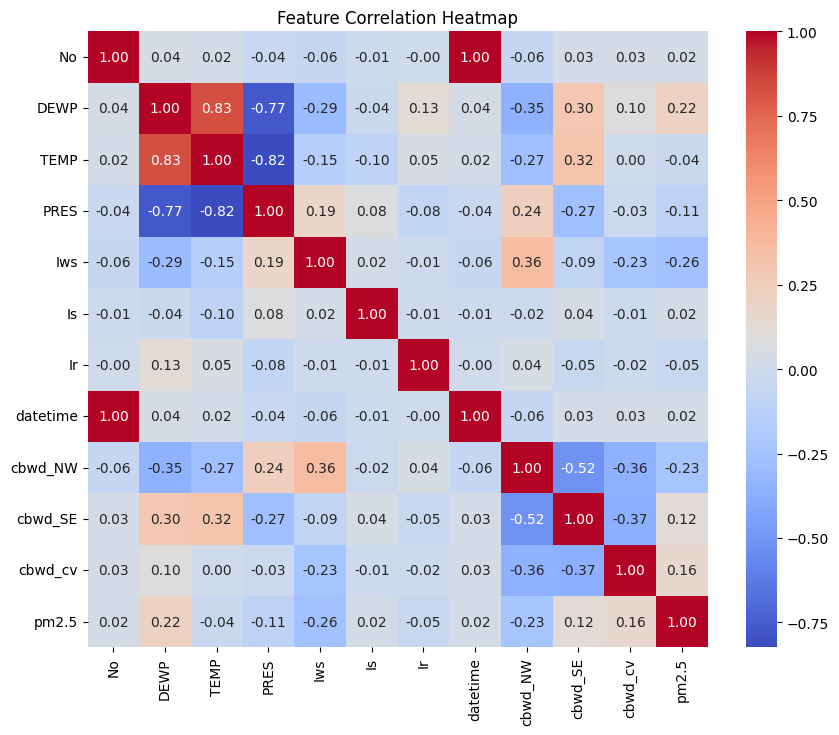

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


✅ Purpose: Identify highly correlated features.

##  PM2.5 Histogram & Distribution

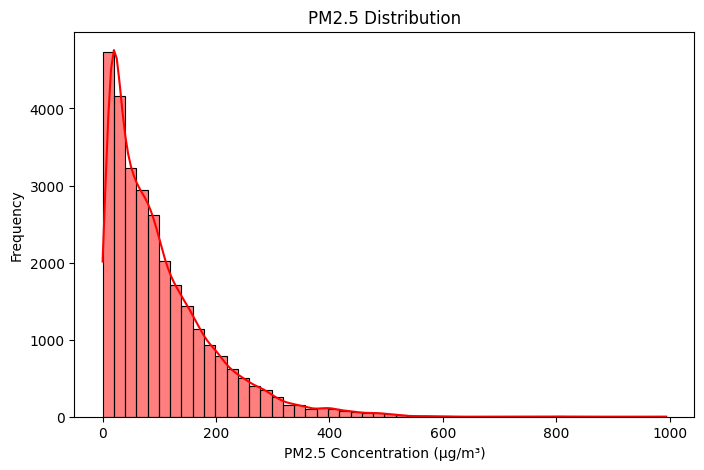

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(train['pm2.5'], bins=50, kde=True, color='red')
plt.xlabel('PM2.5 Concentration (µg/m³)')
plt.ylabel('Frequency')
plt.title('PM2.5 Distribution')
plt.show()


✅ Purpose: Check for skewness in PM2.5 values.

## Boxplot: Wind Direction vs PM2.5

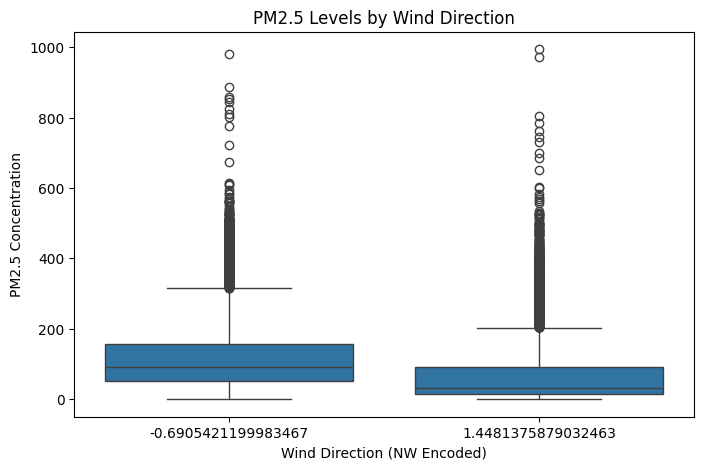

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cbwd_NW', y='pm2.5', data=train)
plt.xlabel('Wind Direction (NW Encoded)')
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Levels by Wind Direction')
plt.show()


✅ Purpose: Understand how wind direction affects pollution.

## Rolling Average to Smooth Trends

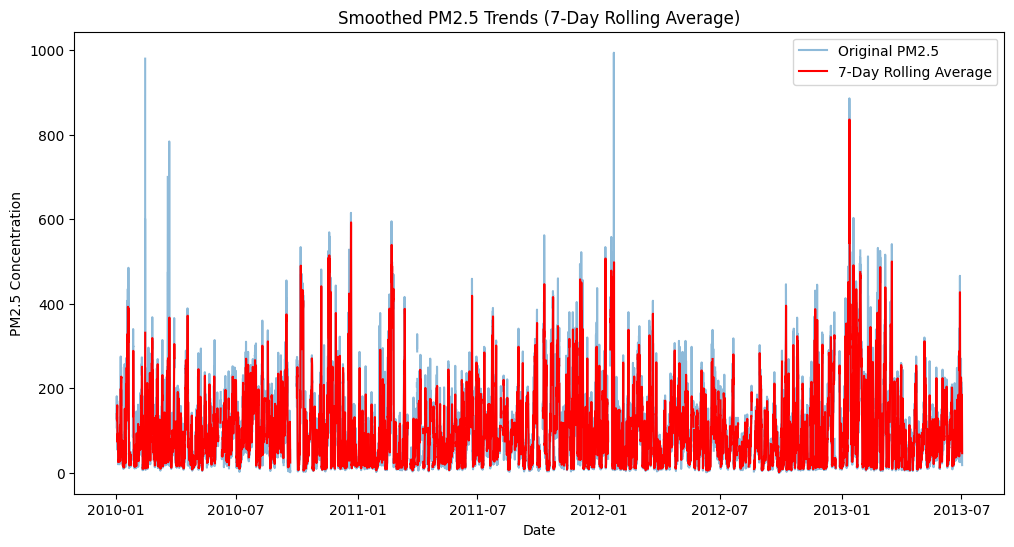

In [37]:
train['pm2.5_rolling'] = train['pm2.5'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(train['datetime'], train['pm2.5'], alpha=0.5, label='Original PM2.5')
plt.plot(train['datetime'], train['pm2.5_rolling'], color='red', label='7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Smoothed PM2.5 Trends (7-Day Rolling Average)')
plt.legend()
plt.show()


In [38]:
# Ensure 'datetime' column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])

# Set the 'datetime' column as the index for better time-series handling
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)


✅ Purpose: Detect seasonal patterns.

# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

In [39]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)


# Separate features and target

- Feel free to trop any non-essential columns like that you think might not contribute to modeling.

In [40]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']

In [41]:
# Reshape data for LSTM input
# LSTM models require data in the shape (samples, timesteps, features).
# Here, the data is reshaped to add a "timesteps" dimension.
X_train = np.expand_dims(X_train, axis=1)

# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
model_2 = Sequential([
   
    Bidirectional(LSTM(256, return_sequences=True, activation='tanh', 
                      input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.4),
    BatchNormalization(),
    
   
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh')),
    Dropout(0.4),
    BatchNormalization(),
   
    Bidirectional(LSTM(64, return_sequences=True, activation='tanh')),
    Dropout(0.3),
    BatchNormalization(),
    
  
    Bidirectional(LSTM(32, activation='tanh')),
    Dropout(0.2),
    
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)


optimizer = AdamW(
    learning_rate=0.0005,  
    weight_decay=0.001     
)


model_2.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

c:\Users\LENOVO\competition\env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
# Train the model
# You can adjust the number of epochs and batch size to improve performance.
history = model_2.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]  
)

Epoch 1/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - loss: 7631.5386 - root_mean_squared_error: 84.5494
Epoch 2/10
  7/959 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 1687.9031 - root_mean_squared_error: 41.0187

c:\Users\LENOVO\competition\env\lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,root_mean_squared_error
  current = self.get_monitor_value(logs)


959/959 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 2113.5005 - root_mean_squared_error: 45.9651
Epoch 3/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 1917.1741 - root_mean_squared_error: 43.7741
Epoch 4/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 2003.9003 - root_mean_squared_error: 44.7346
Epoch 5/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 1948.6603 - root_mean_squared_error: 44.0935
Epoch 6/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 1864.4965 - root_mean_squared_error: 43.1682
Epoch 7/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - loss: 1855.9479 - root_mean_squared_error: 43.0532
Epoch 8/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 1787.0090 - root_mean_squared_error: 42.2509
Epoch 9/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - loss: 1701.9833 - root_mean_squared_error: 41.2445
Epoch 10/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 1824.8937 - root_mean_squared_error: 42.6968


959/959 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


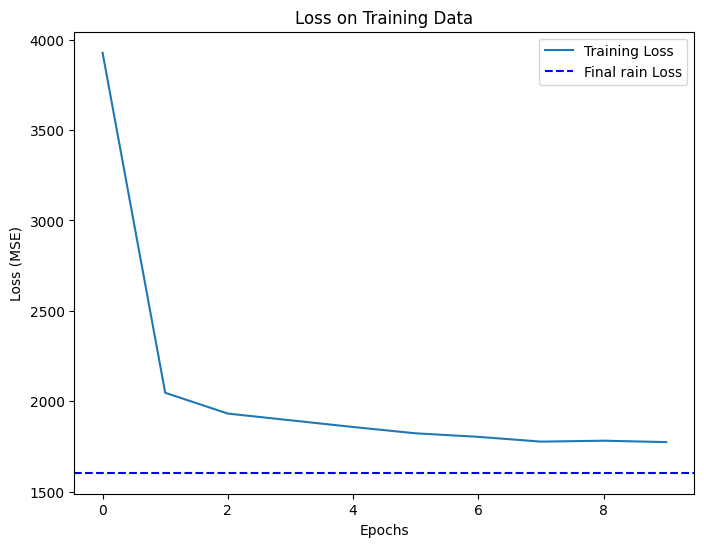

Final Training Loss (MSE): 1605.4970241832245


In [76]:
# Calculate training loss
train_predictions = model_1.predict(X_train)
train_loss = np.mean((y_train - train_predictions.flatten())**2)

# Plot training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Training loss during epochs
plt.axhline(y=train_loss, color='blue', linestyle='--', label='Final rain Loss')  # Final training loss
plt.title('Loss on Training Data')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

print(f"Final Training Loss (MSE): {train_loss}")

In [ ]:
model_2 = Sequential([
    # First LSTM block with more units
    Bidirectional(LSTM(256, return_sequences=True, activation='tanh', 
                      input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.4),
    BatchNormalization(),
    
    # Second LSTM block
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh')),
    Dropout(0.4),
    BatchNormalization(),
    
    # Third LSTM block
    Bidirectional(LSTM(64, return_sequences=True, activation='tanh')),
    Dropout(0.3),
    BatchNormalization(),
    
    # Final LSTM layer
    Bidirectional(LSTM(32, activation='tanh')),
    Dropout(0.2),
    
    # Enhanced Dense layers
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])


# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Early stopping with longer patience
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Modified optimizer settings
optimizer = AdamW(
    learning_rate=0.0005,  # Lower initial learning rate
    weight_decay=0.001     # Reduced weight decay
)

# Compile with the same metrics
model_2.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [21]:
# Prepare the test data
X_test = test.drop(['No'], axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Make predictions on the test set using trained model to predict "pm2.5" concentrations
predictions = model.predict(X_test)

# Ensure predictions do not contain NaN values
predictions = np.nan_to_num(predictions)

# Convert predictions to integers
predictions = np.round(predictions).astype(int)

# Prepare the submission file
# Convert 'row ID' index to string and remove leading zeros for single-digit hours
submission = pd.DataFrame({
    'row ID': pd.to_datetime(test.index).strftime('%Y-%m-%d %-H:%M:%S'),  # Remove leading zeros for hours
    'pm2.5': predictions.flatten()
})

# Sort the submission by 'row ID' to match the solution file exactly
submission = submission.sort_values(by='row ID')

# Save the file in CSV format for submission on Kaggle
submission.to_csv('subm_fixed.csv', index=False)

411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
